<a href="https://colab.research.google.com/github/BachokunIAR/pytorch-deep-learning/blob/main/05_PyTorch_Going_Modular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

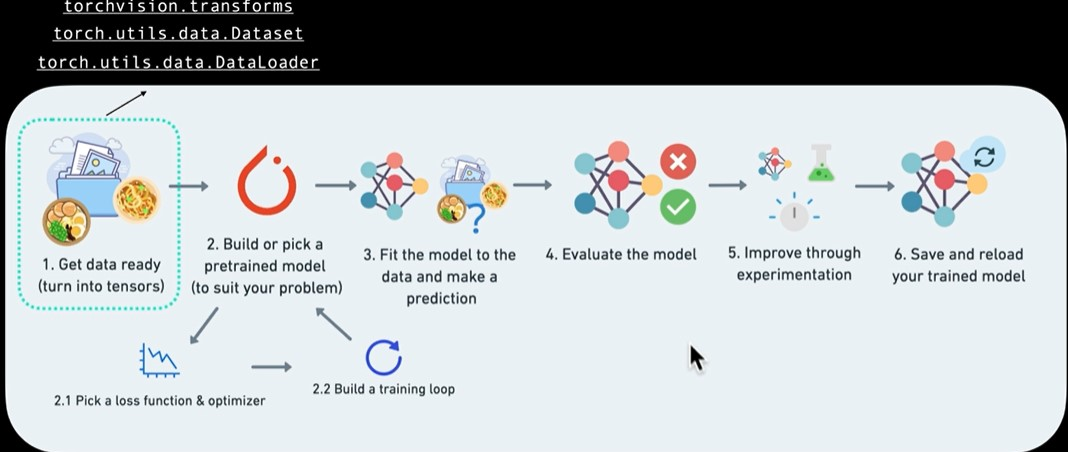

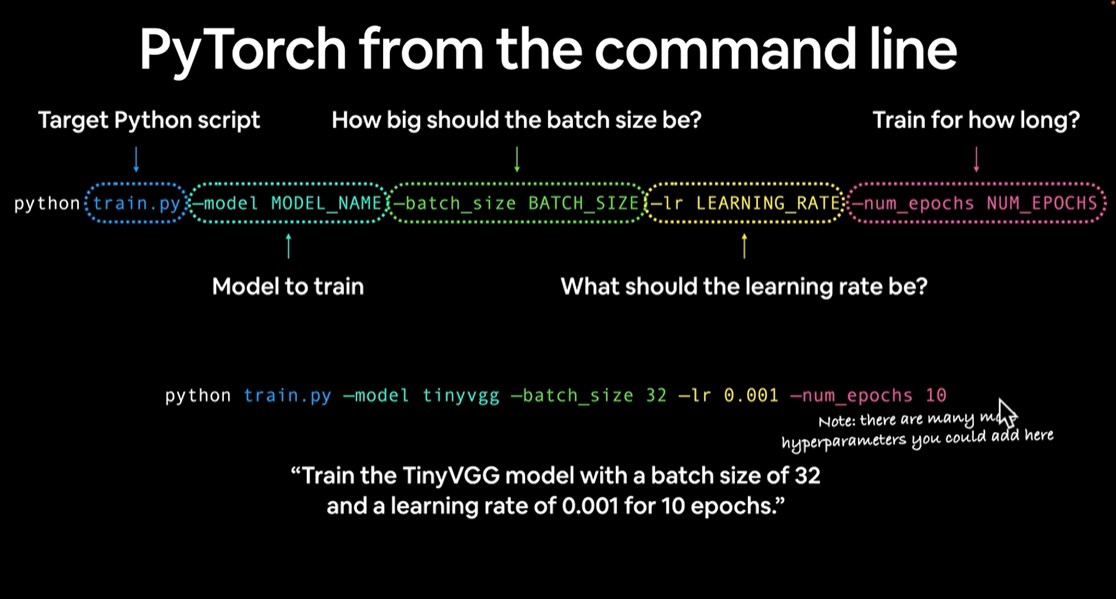

In [80]:
# Howto craete script with magic tool in python
%%writefile hello_world.py
print("hello world, KhadeeJah is my beautiful daughter!")

Overwriting hello_world.py


In [81]:
!python hello_world.py

hello world, KhadeeJah is my beautiful daughter!


## <font color = red> 0. Creating a folder for storing Python scripts.
The first thing to do is to crate a folder to store the scripts one will be writing. we do that by using pythons ***os.makedirs()*** method.





In [82]:
import os

os.makedirs("going_modular",exist_ok=True)

# <font color =red> 1. Getting the Data

In [83]:
import os
import zipfile
from pathlib import Path
import requests
# setting up path to data folder

data_path = Path('data/')
image_path = data_path/"pizza_steak_sushi"
# If the image folder does not exist, download and prepare it ...
if image_path.is_dir():
  print(f"{image_path} directory exists")

else:
  print(f"{image_path} directory is not available, creating one ...")
  image_path.mkdir(parents=True, exist_ok = True)
# This will Download pizza, steak, sushi data
with open(data_path/"pizza_steak_sushi.zip",'wb') as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

  # Unzipping pizza, steak, and sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping the pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

  # REMOVING ZIPFILE
os.remove(data_path/'pizza_steak_sushi.zip')

data/pizza_steak_sushi directory exists
Unzipping the pizza, steak and sushi data...


In [84]:
# setting up train and test paths
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

#<font color = red> 2. Create Datasets and DataLoaders

In [85]:
# Turnin the data into PyTorch Datasets and DataLoader
from torchvision import datasets, transforms
# create simple transform
data_transform = transforms.Compose([
                                    transforms.Resize((64,64)),
                                    transforms.ToTensor()
                                    ])
# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(root = train_dir,# target folder of the image
                                 transform = data_transform, # transform to be performed on the data
                                 target_transform= None)

test_data = datasets.ImageFolder(root = test_dir,# target folder of the image
                                 transform = data_transform # transform to be performed on the data
                              )
print(f"Train data:\n{train_data} \nTest data{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           ) 
Test dataDataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )


In [86]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [87]:
# getting clas names as dictionary
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [88]:
len(train_data), len(test_data)

(225, 75)

In [89]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_data,
                              batch_size=1, # number of samples per batch
                              num_workers=1,# how many subprocesses to use for data loading? (higher = more)
                              shuffle= True # shuffle data
                              )

test_dataloader =DataLoader(dataset=test_data,
                            batch_size=1,
                            num_workers=1,
                            shuffle= False# test data are not shuffled usually
                            )
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b33812eb0d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b33812ebe80>)

In [90]:
# Check out single image size/shape
img, label = next(iter(train_dataloader))
# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


# <font color =red> 2.1 Create Datasets and DataLoaders (script mode)
Puting all the code above in a script. This will save us from having to write the same code all the time to do the same function.

In [91]:
%%writefile going_modular/data_setup.py
"""
    This section Contains functionality for creating PyTorch DataLoaders for
    image classification data.
"""
import os

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int=NUM_WORKERS
):
  """Creates training and testing DataLoaders.

  Takes in a training and testing directory path and turns
  them into PyTorch Datasets and then into PyTorch DataLoaders.

  Args:
    train_dir: Path to training directory.
    test_dir: Path to testing directory.
    transform: torchvision transforms to perform on training and testing data.
    batch_size: Number of samples per batch in each of the DataLoaders.
    num_workers: An integer for number of workers per DataLoader.

  Returns:
    A tuple of (train_dataloader, test_dataloader, class_names).
    Where class_names is a list of the target classes.
    Example usage:
      train_dataloader, test_dataloader, class_names = \
        = create_dataloaders(train_dir=path/to/train_dir,
                             test_dir=path/to/test_dir,
                             transform=some_transform,
                             batch_size=32,
                             num_workers=4)
  """
  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names

Overwriting going_modular/data_setup.py


# <font color =red> 3. Making a model (TinyVGG)

In [92]:
import torch
from torch import nn
class TinyVGG(nn.Module):
  """
    This creates Model architecture.
    Replicates the TinyVGG architecture from the CNN explainer website in PyTorch
    https://poloclub.github.io/cnn-explainer/

    Args:
    input_shape : an integer indicating the number of input shannels (number of date labels)
    hidden_unit: an integer indicating the number of hidden units between layers
    outout_shape: an integer indicating the number of output units
    """
  def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2 # default stride value is same as kernel_size
            )
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )

        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*4,
                      out_features=output_shape)
        )

  def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.classifier(x) # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion




In [93]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)
model_ABD1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=100,
                  output_shape=len(train_data.classes)).to(device)
model_ABD1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Li

In [94]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_ABD1.eval()
with torch.inference_mode():
    pred = model_ABD1(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}") # Here  when you run the model many times, most of the predictions will be wrong

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[-0.0205,  0.0048,  0.0067]])

Output prediction probabilities:
tensor([[0.3275, 0.3359, 0.3366]])

Output prediction label:
tensor([2])

Actual label:
1


#<font color =red> 3.1 Making a model (TinyVGG) (script mode)

In [95]:
%%writefile going_modular/model_builder.py

import torch
from torch import nn
class TinyVGG(nn.Module):
  """
    This creates Model architecture.
    Replicates the TinyVGG architecture from the CNN explainer website in PyTorch
    https://poloclub.github.io/cnn-explainer/

    Args:
    input_shape : an integer indicating the number of input shannels (number of date labels)
    hidden_unit: an integer indicating the number of hidden units between layers
    outout_shape: an integer indicating the number of output units
    """
  def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2 # default stride value is same as kernel_size
            )
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )

        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*4,
                      out_features=output_shape)
        )

  def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.classifier(x) # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion


Overwriting going_modular/model_builder.py


# Create an instance of TinyVGG (from the script).

In [96]:
import torch

from going_modular import model_builder

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)
model_ABD1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=100,
                  output_shape=len(train_data.classes)).to(device)
model_ABD1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Li

# Doing a dummy forward pass on model_ABD1

In [97]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_ABD1.eval()
with torch.inference_mode():
    pred = model_ABD1(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[-0.0205,  0.0048,  0.0067]])

Output prediction probabilities:
tensor([[0.3275, 0.3359, 0.3366]])

Output prediction label:
tensor([2])

Actual label:
1


# <font color = red> 4. Creating train_step() and test_step() functions and train() to combine them


In [98]:
# making Train_step()
from typing import Tuple
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device:torch.device)-> Tuple[float,float]:
   """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
   model.train()

    # Setup train loss and train accuracy values
   train_loss, train_acc = 0, 0

    # Loop through data loader data batches
   for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
   train_loss = train_loss / len(dataloader)
   train_acc = train_acc / len(dataloader)
   return train_loss, train_acc

In [99]:
# making test_step()
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device :torch.device) -> Tuple[float,float]:
  """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
  model.eval()

    # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

    # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)
  # 1. Forward pass
      test_pred_logits = model(X)

  # 2. Calculate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

  # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))


    # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

# Combining train_step() and test_step()

In [100]:
from tqdm.auto import tqdm
from typing import Dict, List

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device:torch.device) ->Dict[str,List[float]]:


    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]}
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]}
    """

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           #device = device
                                           )
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                           loss_fn=loss_fn
                                        )

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

#<font color=red> 4.1 Creating train_step() and test_step() functions and train() to combine them (script mode)

In [101]:
%%writefile going_modular/engine.py
"""
This contains functions for training and testing a PyTorch model.
"""
from typing import Tuple
from tqdm.auto import tqdm
from typing import Dict, List,Tuple
import torch
#=========making Train_step()===================

from typing import Tuple
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device:torch.device)-> Tuple[float,float]:
   """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)

    """
    # Put model in train mode
   model.train()

    # Setup train loss and train accuracy values
   train_loss, train_acc = 0, 0

    # Loop through data loader data batches
   for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
   train_loss = train_loss / len(dataloader)
   train_acc = train_acc / len(dataloader)
   return train_loss, train_acc

   #=========making Test_step()===================

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device :torch.device) -> Tuple[float,float]:

  """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
    # Put model in eval mode
  model.eval()

    # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

    # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)
  # 1. Forward pass
      test_pred_logits = model(X)

  # 2. Calculate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

  # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))


    # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

#===========================================================
# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device:torch.device) ->Dict[str,List[float]]:


    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]}
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]}
    """

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device = device
                                           )
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                           loss_fn=loss_fn,
                                           device = device
                                        )

  # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

  # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

Overwriting going_modular/engine.py


# <font color= red> 5. Creating a function to save the model
Setting up the function to save the model

In [102]:
from pathlib import Path
import torch
def save_model(model:torch.nn.Module,
               target_dir:str,
               model_name:str):
  """Saves a PyTorch model to a target directory.

    Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

    Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
    """

  # creating target model
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok = True)
  # creating the model save path

  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or"
  model_save_path = target_dir_path/model_name
  # Save the model state_dict()

  print(f"[INFO] saving model to:{model_save_path}")
  torch.save(obj=model.state_dict(),
             f = model_save_path)

# <font color = red> 5.1 Creating a function to save the model (script mode)

In [103]:
%%writefile going_modular/utils.py
"""
Contains various utility functions for PyTorch model training and saving.
"""
#===================================

from pathlib import Path
import torch
def save_model(model:torch.nn.Module,
               target_dir:str,
               model_name:str):
  """Saves a PyTorch model to a target directory.

    Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

    Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tinyvgg_model.pth")
    """

  # creating target model
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok = True)
  # creating the model save path

  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or"
  model_save_path = target_dir_path/model_name
  # Save the model state_dict()

  print(f"[INFO] saving model to:{model_save_path}")
  torch.save(obj=model.state_dict(),
             f = model_save_path)

Overwriting going_modular/utils.py


# <font color = red> 6. Train, evaluate and save the model


 1 . Import the various dependencies, namely torch, os, torchvision.transforms and all of the scripts from the going_modular directory, data_setup, engine, model_builder, utils.

2 . Note: Since train.py will be inside the going_modular directory, we can import the other modules via import ... rather than from going_modular import ....

3 . Setup various hyperparameters such as batch size, number of epochs, learning rate and number of hidden units (these could be set in the future via Python's argparse).

4 . Setup the training and test directories.

5 . Setup device-agnostic code.

6 . Create the necessary data transforms.

7 . Create the DataLoaders using data_setup.py.

8 . Create the model using model_builder.py.

9 . Setup the loss function and optimizer.

10 . Train the model using engine.py.

11 . Save the model using utils.py.

12.  create the file from a notebook cell using the line %%writefile going_modular/train.py:

In [108]:
#%%writefile going_modular/train.py
"""
Trains a PyTorch image classification model using device-agnostic code.
"""
import os
import torch
#import data_setup, engine, model_builder, utils

from torchvision import transforms
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_ABD1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=60,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_ABD1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_ABD1
model_ABD1_results = train(model=model_ABD1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device = device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

# saving the model
save_model(model=model_ABD1,
           target_dir = 'models',
           model_name = "05_going_modular_cell_mode_tinyvgg_model.pth")

Overwriting going_modular/train.py


#<font color = red> 6.1 Train, evaluate and save the model (script)

In [111]:

%%writefile going_modular/train.py
"""
Trains a PyTorch image classification model using device-agnostic code.
"""
import os
import torch
import data_setup, engine, model_builder, utils
from torchvision import transforms
from torchvision import transforms

# Setup hyperparameters
NUM_EPOCHS = 15
BATCH_SIZE = 32
HIDDEN_UNITS = 10
LEARNING_RATE = 0.001

# Setup directories
train_dir = "data/pizza_steak_sushi/train"
test_dir = "data/pizza_steak_sushi/test"

# Setup target device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create transforms
data_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create DataLoaders with help from data_setup.py
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transform,
    batch_size=BATCH_SIZE
)

# Create model with help from model_builder.py
model = model_builder.TinyVGG(
    input_shape=3,
    hidden_units=HIDDEN_UNITS,
    output_shape=len(class_names)
).to(device)

# Set loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

# Start training with help from engine.py
engine.train(model=model,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

# Save the model with help from utils.py
utils.save_model(model=model,
                 target_dir="models",
                 model_name="going_modular_script_mode_tinyvgg_model.pth")

Overwriting going_modular/train.py


In [112]:
!python going_modular/train.py

  0% 0/15 [00:00<?, ?it/s]Epoch: 1 | train_loss: 1.0980 | train_acc: 0.4141 | test_loss: 1.1048 | test_acc: 0.1979
  7% 1/15 [00:03<00:44,  3.20s/it]Epoch: 2 | train_loss: 1.1014 | train_acc: 0.2930 | test_loss: 1.1225 | test_acc: 0.1979
 13% 2/15 [00:05<00:31,  2.45s/it]Epoch: 3 | train_loss: 1.0929 | train_acc: 0.3008 | test_loss: 1.1321 | test_acc: 0.3125
 20% 3/15 [00:07<00:26,  2.24s/it]Epoch: 4 | train_loss: 1.0916 | train_acc: 0.3203 | test_loss: 1.1437 | test_acc: 0.2188
 27% 4/15 [00:09<00:23,  2.13s/it]Epoch: 5 | train_loss: 1.1154 | train_acc: 0.3750 | test_loss: 1.1393 | test_acc: 0.2917
 33% 5/15 [00:11<00:20,  2.06s/it]Epoch: 6 | train_loss: 1.0785 | train_acc: 0.4805 | test_loss: 1.1045 | test_acc: 0.2917
 40% 6/15 [00:12<00:18,  2.03s/it]Epoch: 7 | train_loss: 1.0472 | train_acc: 0.5508 | test_loss: 1.0502 | test_acc: 0.4934
 47% 7/15 [00:16<00:19,  2.41s/it]Epoch: 8 | train_loss: 0.9260 | train_acc: 0.5977 | test_loss: 1.0043 | test_acc: 0.4924
 53% 8/15 [00:18<00:16, 